In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pylab as plt
import numpy as np
import cv2

2023-11-08 21:36:13.309716: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'tensorflow_datasets'

In [1]:
#a) Load the oxford_iiit_pet dataset

# Construct a tf.data.Dataset
train_ds, test_ds = tfds.load('oxford_iiit_pet', split=['train','test'], shuffle_files=True)
# Which split of the data to load (e.g. 'train', 'test', ['train','test'], 'train[80%:]',...). See our split API guide. If None, will return all splits in a Dict[Split, tf.data.Dataset]
print(train_ds.shape)

NameError: name 'tfds' is not defined

In [ ]:
# import cv2

# plt.figure(figsize=(5, 4))
# for i in range(4):
#   ax = plt.subplot(2, 2, i + 1)
#   resized = cv2.resize(X_train[i], (28, 28), cv2.INTER_AREA)
#   title = 'Label is {label}'.format(label=y_train[i])
#   plt.xticks()
#   plt.yticks()
#   plt.imshow(resized, cmap='gray')

# plt.show()

def read_and_preprocess(data):
  input_image = cv2.resize(data, (128, 128), cv2.INTER_AREA)    #Resize the data['image'] to 128x128
  input_mask = cv2.resize(data['segmentation_mask'], (128, 128), cv2.INTER_AREA)   #Resize the data['segmentation_mask'] to 128x128
  
  input_image = tf.image.convert_image_dtype(input_image, tf.float32) # [0,1]
  print(input_image.shape)
  input_mask -= 1 # {1,2,3} to {0,1,2}
  print(input_mask.shape)

  return input_image, input_mask

In [ ]:
train = dataset['train'].map(read_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test = dataset['test'].map(read_and_preprocess)

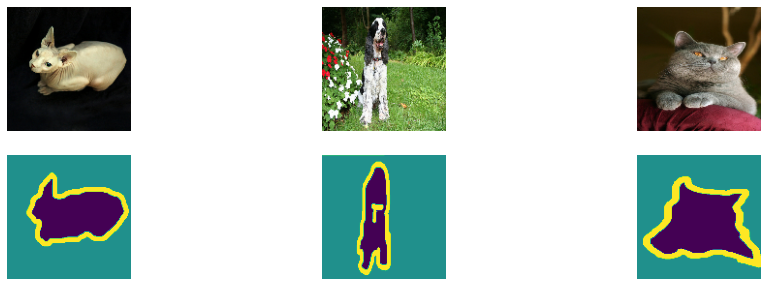

In [ ]:
# b) Create the segmentation mask
# Show some images from dataset and their segmented version

**Part 2- Annotation**

In [ ]:
# Install mrcnn

In [ ]:
# Get data from here https://github.com/experiencor/raccoon_dataset


fatal: destination path 'raccoon_dataset' already exists and is not an empty directory.


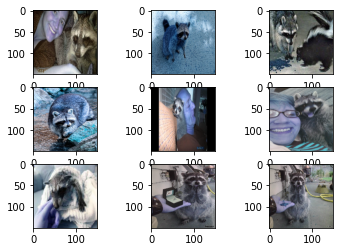

In [ ]:
# Look into data
# Plot some samples here


In [ ]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
 
# class that defines and loads the raccoon dataset
class RaccoonDataset(Dataset):
	# load the dataset definitions
	def load_dataset(self, dataset_dir, is_train=True):
		# define one class
		self.add_class("raccoon_dataset", 1, "raccoon")
		# define data locations
		images_dir = dataset_dir + '/images/'
		annotations_dir = dataset_dir + '/annotations/raccoon-'
		# find all images
		for filename in listdir(images_dir):
			# extract image id
			image_id = filename[8:-4]
			# skip bad images
			if image_id in ['00090']:
				continue
			# skip all images after 150 if we are building the train set
			if is_train and int(image_id) >= 150:
				continue
			# skip all images before 150 if we are building the test/val set
			if not is_train and int(image_id) < 150:
				continue
			img_path = images_dir + filename
			ann_path = annotations_dir + image_id + '.xml'
			# add to dataset
			self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
 
	# extract bounding boxes from an annotation file
	def extract_boxes(self, filename):
		# load and parse the file
		tree = ElementTree.parse(filename)
		# get the root of the document
		root = tree.getroot()
		# extract each bounding box
		boxes = list()
		for box in root.findall('.//bndbox'):
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes.append(coors)
		# extract image dimensions
		width = int(root.find('.//size/width').text)
		height = int(root.find('.//size/height').text)
		return boxes, width, height
 
	# load the masks for an image
	def load_mask(self, image_id):
		# get details of image
		info = self.image_info[image_id]
		# define box file location
		path = info['annotation']
		# load XML
		#path = '/content/raccoon_dataset/annotations/raccoon-'+image_id   #Added by me
		boxes, w, h = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
		masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
		class_ids = list()
		for i in range(len(boxes)):
			box = boxes[i]
			row_s, row_e = box[1], box[3]
			col_s, col_e = box[0], box[2]
			masks[row_s:row_e, col_s:col_e, i] = 1
			class_ids.append(self.class_names.index('raccoon'))
		return masks, asarray(class_ids, dtype='int32')
 
	# load an image reference
	def image_reference(self, image_id):
		info = self.image_info[image_id]
		return info['path']
 
# train set
train_set = RaccoonDataset()
train_set.load_dataset('raccoon_dataset', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
 
# test/val set
test_set = RaccoonDataset()
test_set.load_dataset('raccoon_dataset', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 149
Test: 51


In [ ]:
# load an image
# Use the function above to create the image and its mask

**Part 3- YOLO 8**




In [ ]:
# a- Create annotation
# You can upload the file using ![title](filename.jpeg)
# import image module



In [ ]:
#b- Now, we want to install Yolo8.
# Download required tools
# Clone yolo 8 and check all dependencies


Cloning into 'yolov5'...
remote: Enumerating objects: 12618, done.
remote: Total 12618 (delta 0), reused 0 (delta 0), pack-reused 12618
Receiving objects: 100% (12618/12618), 12.45 MiB | 16.79 MiB/s, done.
Resolving deltas: 100% (8651/8651), done.
/content/yolov5
     |████████████████████████████████| 596 kB 33.7 MB/s 


In [ ]:
#c- Train the model here
# Follow the Github instruction to train a YOLO8 model here

In [ ]:
#d- Test model
#Import ultralytics
# Test this above trained model on an image. For example: https://ultralytics.com/images/bus.jpg


In [ ]:
# e- See the result.
# Show the result and all the assigned objects here

In [ ]:
# What is your understanding from this image? What is the meaning of these numbers all over the image?